In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import time
from sklearn.model_selection import train_test_split

font = r'C:\Windows\Fonts\simfang.ttf'

In [2]:
data = pd.read_csv(r"./dataset/data/train.csv")
data

,id,club,league,birth_date,height_cm,weight_kg,nationality,potential,pac,sho,...,st,lw,cf,cam,cm,cdm,cb,lb,gk,y
0,0,293,25,10/4/96,177,72,78,73,65,60,...,63.0,64.0,64.0,64.0,63.0,57.0,53.0,56.0,NaN,70.0
1,1,258,24,9/21/84,178,70,51,62,56,39,...,52.0,60.0,57.0,59.0,61.0,64.0,61.0,64.0,NaN,24.0
2,2,112,3,6/8/99,177,69,52,68,68,57,...,56.0,54.0,55.0,53.0,45.0,34.0,31.0,36.0,NaN,17.0
3,3,604,9,7/25/88,181,81,54,81,76,74,...,77.0,76.0,77.0,77.0,79.0,78.0,77.0,78.0,NaN,1750.0
4,4,80,37,8/4/80,179,75,96,72,40,62,...,62.0,66.0,65.0,68.0,71.0,70.0,66.0,64.0,NaN,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10436,10436,277,9,5/24/98,176,79,1,75,74,43,...,52.0,54.0,53.0,52.0,52.0,58.0,60.0,62.0,NaN,55.0
10437,10437,101,8,7/27/91,178,68,147,62,66,38,...,50.0,54.0,52.0,54.0,56.0,60.0,60.0,60.0,NaN,25.0
10438,10438,626,26,2/29/92,178,72,64,77,81,77,...,76.0,72.0,73.0,70.0,62.0,46.0,41.0,46.0,NaN,1000.0
10439,10439,147,9,11/25/89,186,79,1,76,70,74,...,74.0,69.0,72.0,69.0,64.0,52.0,49.0,50.0,NaN,800.0


In [3]:
today = pd.to_datetime('2018-01-01')
data['birth_date'] = pd.to_datetime(data['birth_date'])
data['age'] = np.round((today - data['birth_date']).apply(lambda x: x.days) / 365.,1)
data

,id,club,league,birth_date,height_cm,weight_kg,nationality,potential,pac,sho,...,lw,cf,cam,cm,cdm,cb,lb,gk,y,age
0,0,293,25,1996-10-04,177,72,78,73,65,60,...,64.0,64.0,64.0,63.0,57.0,53.0,56.0,NaN,70.0,21.3
1,1,258,24,1984-09-21,178,70,51,62,56,39,...,60.0,57.0,59.0,61.0,64.0,61.0,64.0,NaN,24.0,33.3
2,2,112,3,1999-06-08,177,69,52,68,68,57,...,54.0,55.0,53.0,45.0,34.0,31.0,36.0,NaN,17.0,18.6
3,3,604,9,1988-07-25,181,81,54,81,76,74,...,76.0,77.0,77.0,79.0,78.0,77.0,78.0,NaN,1750.0,29.5
4,4,80,37,1980-08-04,179,75,96,72,40,62,...,66.0,65.0,68.0,71.0,70.0,66.0,64.0,NaN,97.5,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10436,10436,277,9,1998-05-24,176,79,1,75,74,43,...,54.0,53.0,52.0,52.0,58.0,60.0,62.0,NaN,55.0,19.6
10437,10437,101,8,1991-07-27,178,68,147,62,66,38,...,54.0,52.0,54.0,56.0,60.0,60.0,60.0,NaN,25.0,26.5
10438,10438,626,26,1992-02-29,178,72,64,77,81,77,...,72.0,73.0,70.0,62.0,46.0,41.0,46.0,NaN,1000.0,25.9
10439,10439,147,9,1989-11-25,186,79,1,76,70,74,...,69.0,72.0,69.0,64.0,52.0,49.0,50.0,NaN,800.0,28.1


In [4]:
cols = ['potential','age','y']
data = pd.DataFrame(data,columns = cols)
median_num = data['y'].median()

In [5]:
data.loc[(data['y']>=median_num),'y'] = 1
data.loc[(data['y']!=1),'y'] = -1
data = data.sample(frac=1)
data = data[:1000]

In [6]:
feature = ['potential','age']
data_feature = pd.DataFrame(data,columns = feature)
data_target = pd.DataFrame(data,columns = ['y'])

In [7]:
#Max-Min标准化
#建立MinMaxScaler对象
minmax = preprocessing.MinMaxScaler()
# 标准化处理
data_feature = minmax.fit_transform(data_feature)
data_feature[:10]

array([[0.6969697 , 0.65531915],
       [0.3030303 , 0.70638298],
       [0.15151515, 0.62978723],
       [0.45454545, 0.51489362],
       [0.42424242, 0.39574468],
       [0.27272727, 0.19574468],
       [0.6969697 , 0.29361702],
       [0.24242424, 0.19148936],
       [0.3030303 , 0.53191489],
       [0.93939394, 0.29361702]])

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(data_feature, data_target, test_size=0.2, random_state=0)

In [9]:
X_train[:10]

array([[0.51515152, 0.52765957],
       [0.21212121, 0.11914894],
       [0.24242424, 0.1106383 ],
       [0.51515152, 0.31489362],
       [0.45454545, 0.52765957],
       [0.33333333, 0.35744681],
       [0.48484848, 0.05531915],
       [0.21212121, 0.04255319],
       [0.93939394, 0.16595745],
       [0.24242424, 0.53617021]])

In [10]:
Y_train = Y_train.values
Y_test = Y_test.values

In [11]:
data = data.values
# data

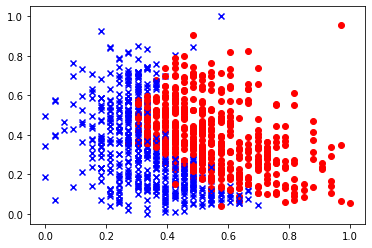

In [12]:
for i in range(len(data)):
    if data[i][-1] == 1:
        plt.scatter(data_feature[i][0],data_feature[i][1],c='r',marker='o')
    else:
        plt.scatter(data_feature[i][0],data_feature[i][1],c='b',marker='x')
plt.show()

In [13]:
# training = data_feature[:200]
# test = data_feature[200:]
# # print(len(test))
# training_cons = data[:200]
# test_cons = data[200:300]
# # training_cons[:10]

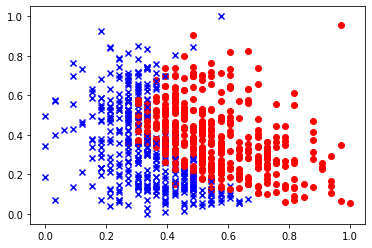

In [14]:
for i in range(len(X_train)):
    if Y_train[i] == 1:
        plt.scatter(X_train[i][0],X_train[i][1],c='r',marker='o')
    else:
        plt.scatter(X_train[i][0],X_train[i][1],c='b',marker='x')
plt.show()

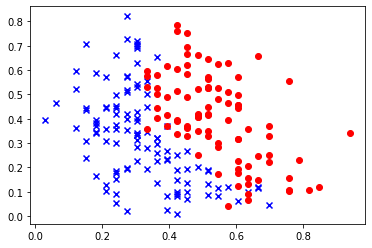

In [15]:
for i in range(len(X_test)):
    if Y_test[i] == 1:
        plt.scatter(X_test[i][0],X_test[i][1],c='r',marker='o')
    else:
        plt.scatter(X_test[i][0],X_test[i][1],c='b',marker='x')
plt.show()

In [16]:
def sign(a):
    if a>0:
        return 1
    else:
        return -1

In [17]:
def feeling():
    w = np.zeros(2)
    lr = 0.01
    c = 1
    cnt = 0
    while True:
        cnt += 1
        if cnt > 1000:
            break
        for i in range(len(X_train)):
            x = np.array(X_train[i])
            y = Y_train[i]

            s = np.sum(w*x)+c
            z = sign(s)
            if y * z <= 0:
                w = w+lr*y*x
                c = c+lr*y
    return cnt,w,c

迭代次数： 1001
超平面法向量： [0.07818182 0.0333617 ]
阈值： [-0.05]


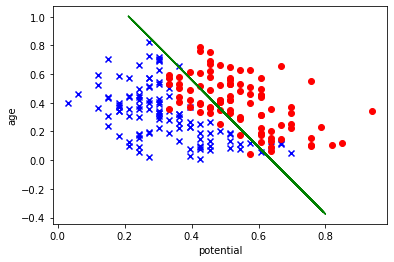

测试集准确率： 0.865


In [18]:
if __name__=='__main__':
    cnt,w,c=feeling()
    print("迭代次数：",cnt)
    print("超平面法向量：",w)
    print("阈值：",c)
    count = 0
    for i in range(len(X_test)):
        target = Y_test[i]
        result = sign(np.sum(w*X_test[i])+c)
        if(target == result):
            count += 1
    accuracy = float(count/len(X_test))
    for i in range(len(X_test)):
        if Y_test[i] == 1:
            plt.scatter(X_test[i][0],X_test[i][1],c='r',marker='o')
        else:
            plt.scatter(X_test[i][0],X_test[i][1],c='b',marker='x')
    X = np.random.uniform(0.2,0.8,100)
    Y = -(w[0]*X+c)/w[1]
    plt.xlabel('potential')
    plt.ylabel('age')
    plt.plot(X,Y,'g')
    plt.show()
    print("测试集准确率：",accuracy)

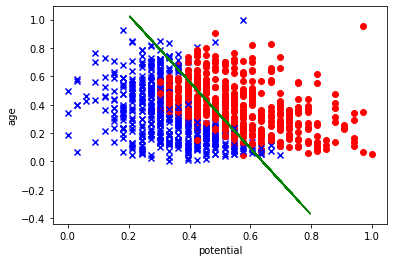

In [19]:
for i in range(len(data)):
    if data[i][-1] == 1:
        plt.scatter(data_feature[i][0],data_feature[i][1],c='r',marker='o')
    else:
        plt.scatter(data_feature[i][0],data_feature[i][1],c='b',marker='x')
X = np.random.uniform(0.2,0.8,100)
Y = -(w[0]*X+c)/w[1]
plt.xlabel('potential')
plt.ylabel('age')
plt.plot(X,Y,'g')
plt.show()

## 口袋算法

In [20]:
def sign(a):
    if a>0:
        return 1
    else:
        return -1

In [21]:
def checkErrorRate(X_train,Y_train,w,c):
    count=0
    for i in range(len(X_train)):
        x=np.array(X_train[i])
        y=Y_train[i]
        if sign(np.sum(w*x)+c)!=sign(y):
            count+=1
    return count/len(X_train)

In [22]:
def Pocket():
    w = np.zeros(2)
    lr = 0.01
    c = 1
    cnt = 0
    best_w = w
    best_c = c
    bestRate = 1
    while True:
        cnt += 1
        if cnt > 1000:
            break
        for i in range(len(X_train)):
            x = np.array(X_train[i])
            y = Y_train[i]

            s = np.sum(w*x)+c
            z = sign(s)
            if y * z <= 0:
                w = w+lr*y*x
                c = c+lr*y
                rate = checkErrorRate(X_train,Y_train,w,c)
#                 print(rate)
                if rate < bestRate:
                    bestRate = rate
                    print("bestRate update",rate)
                    best_w = w
                    best_c = c
    return cnt,best_w,best_c

bestRate update 0.45125
bestRate update 0.44625
bestRate update 0.445
bestRate update 0.44125
bestRate update 0.4275
bestRate update 0.42375
bestRate update 0.40875
bestRate update 0.385
bestRate update 0.3425
bestRate update 0.2975
bestRate update 0.21
bestRate update 0.1825
bestRate update 0.17625
bestRate update 0.17375
bestRate update 0.17125
bestRate update 0.165
bestRate update 0.1575
bestRate update 0.15625
bestRate update 0.1525
迭代次数： 1001
超平面法向量： [0.07818182 0.0333617 ]
阈值： [-0.05]


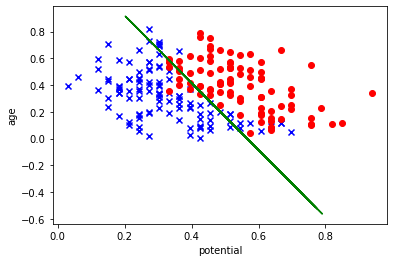

测试集准确率： 0.87


In [23]:
if __name__=='__main__':
    cnt,best_w,best_c=Pocket()
    print("迭代次数：",cnt)
    print("超平面法向量：",w)
    print("阈值：",c)
    count = 0
    for i in range(len(X_test)):
        target = Y_test[i]
        result = sign(np.sum(best_w*X_test[i])+best_c)
        if(target == result):
            count += 1
    accuracy = float(count/len(X_test))
    for i in range(len(X_test)):
        if Y_test[i] == 1:
            plt.scatter(X_test[i][0],X_test[i][1],c='r',marker='o')
        else:
            plt.scatter(X_test[i][0],X_test[i][1],c='b',marker='x')
    X = np.random.uniform(0.2,0.8,100)
    Y = -(best_w[0]*X+best_c)/best_w[1]
    plt.xlabel('potential')
    plt.ylabel('age')
    plt.plot(X,Y,'g')
    plt.show()
    print("测试集准确率：",accuracy)

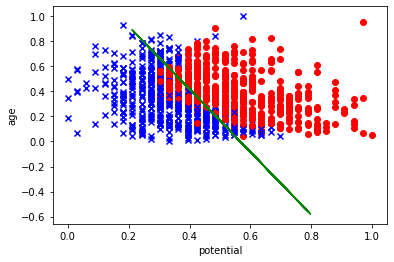

In [24]:
for i in range(len(data)):
    if data[i][-1] == 1:
        plt.scatter(data_feature[i][0],data_feature[i][1],c='r',marker='o')
    else:
        plt.scatter(data_feature[i][0],data_feature[i][1],c='b',marker='x')
X = np.random.uniform(0.2,0.8,100)
Y = -(best_w[0]*X+best_c)/best_w[1]
plt.xlabel('potential')
plt.ylabel('age')
plt.plot(X,Y,'g')
plt.show()